In [335]:

import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt


from sklearn.datasets import load_breast_cancer

In [336]:
df = load_breast_cancer()
df2 = df.data


In [337]:
def initialise_clusters_centroids(df2, k):
    '''Returns k centroids location based on the from the initial data points in df2'''
    return df2[np.random.randint(df2.shape[0], size=k)]
    
def dist_cent_pts(centroid, df2):
    """Returns the distance between the centroid and all the data points in df2"""
    return np.linalg.norm(df2 - centroid, axis=1)

In [338]:
def k_means(df2, k):
    '''This function returns the centroids and the classes/groups of the data points
    The input is np.array and k= number of clusters'''
    
    num_iteration = 500 #number of iterations

    centroids = initialise_clusters_centroids(df2, k) #initialize the centroids
    classes = np.zeros(df2.shape[0], dtype=np.float64) #initialize the classes
    distances = np.zeros([df2.shape[0], k], dtype=np.float64) #initialize the distances between the centroids and the data points

    # Loop through the k-means process num_iteration times
    for i in range(num_iteration):            
        # Start filling the distances matrix
        for i, c in enumerate(centroids):
            distances[:, i] = dist_cent_pts(c, df2)
                
        # Find the classes of each point correspodning to the closest centroid
        classes = np.argmin(distances, axis=1)
            
        # Change the centroid location as the mean of all the points of the same class
        for c in range(k):
            centroids[c] = np.mean(df2[classes == c], 0)
       
    return classes, centroids
        
    

In [345]:
k = [2,3,4,5,6,7]
num_iteration = 500 #number of iterations

error =[]

# Loop through the the process for each k
for k in range(2,8):
    centroids = initialise_clusters_centroids(df2, k) #initialize the centroids
    classes = np.zeros(df2.shape[0], dtype=np.float64) #initialize the classes
    distances = np.zeros([df2.shape[0], k], dtype=np.float64) #initialize the distances between the centroids and the data points

    # Loop through the k-means process num_iteration times
    for i in range(num_iteration):
        
        # Start filling the distances matrix
        for i, c in enumerate(centroids):
            distances[:, i] = dist_cent_pts(c, df2)
            
        # Find the classes of each point correspodning to the closest centroid
        classes = np.argmin(distances, axis=1)
        
        # Change the centroid location as the mean of all the points of the same class
        for c in range(k):
            centroids[c] = np.mean(df2[classes == c], 0)
            
    # Changing the distance to minimum distance           
    for i in range(distances.shape[0]):
        distances[i]=min(distances[i])
    
    # Calculating the error
    calc_dist = 0

    for d in distances:
        calc_dist += d**2
        
    error.append(calc_dist/len(distances))

distances = np.delete(distances, [0,1,2,3,4,5], axis=1) #changing the distance such that there is only one value and not same values in multiple coulmns
for i in range(len(error)): #changing the error such that there is only one value and not same values in multiple coulmns
    error[i] = error[i][0]


In [ ]:
distances

In [ ]:
error

Text(0.5, 1.0, 'Variation of Distortion Value with k')

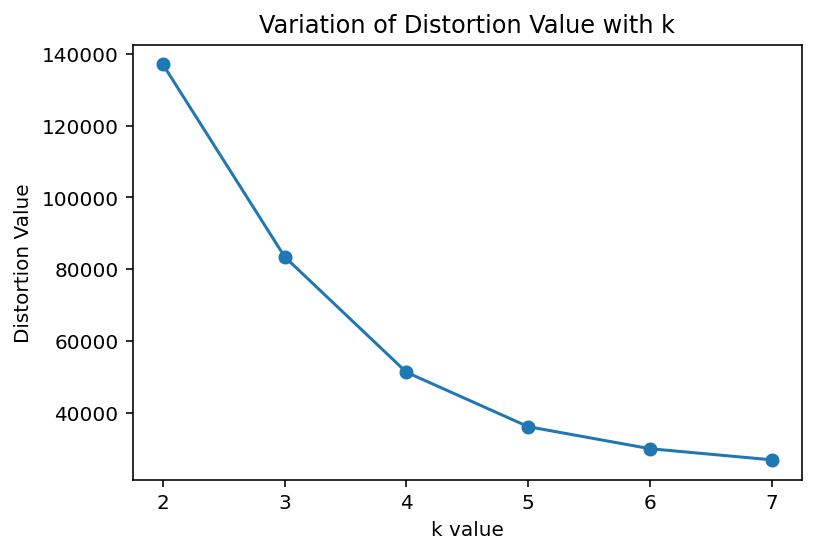

In [347]:
k= [2,3,4,5,6,7]

plt.plot(k, error, marker = 'o')
plt.ylabel("Distortion Value")
plt.xlabel("k value")
plt.title("Variation of Distortion Value with k")
